In [1]:
import distmesh as dm
import numpy as np
import matplotlib.pyplot as plt

count =  200 displacement =  0.007971477334716199
count =  400 displacement =  0.003413795341046567
count =  600 displacement =  0.003176272248794524
count =  800 displacement =  0.001542449695888499


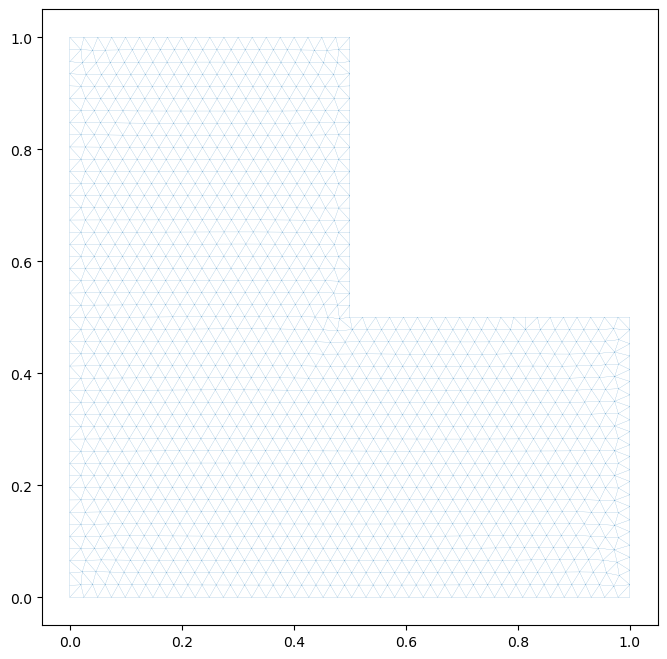

In [2]:
# L-shape
fig, ax = plt.subplots(figsize=(8,8))

dL = lambda p: dm.dunion(dm.drectangle(p,0,0.5,0,1),dm.drectangle(p,0.5,1,0,0.5))
[pts,tri] = dm.distmesh2D(dL,dm.huniform,.025,[0,1,0,1],[[0,0],[1,0],[0,1],[0.5,1],[1,0.5],[0.5,0.5]])

ax.set_aspect(1)
plt.savefig('LShape.pdf')

count =  200 displacement =  0.018585229623295757
count =  400 displacement =  0.0021192323603321617
count =  600 displacement =  0.0025054037895236025


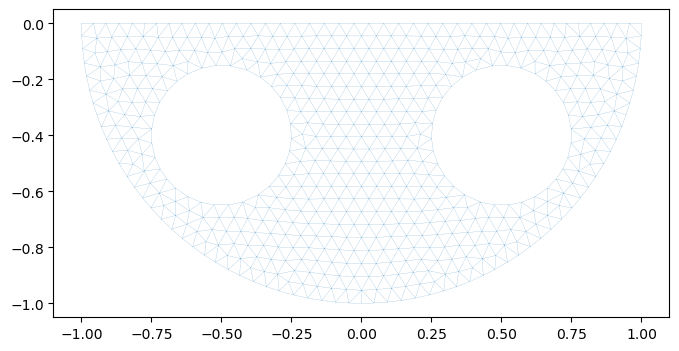

In [3]:
# semicircle with holes
fig, ax = plt.subplots(figsize=(8,4))

dSemicircle = lambda p: dm.dintersect(dm.dcircle(p,0,0,1),dm.drectangle(p,-1,1,-1,0))
daux1 = lambda p: dm.ddiff(dSemicircle(p),dm.dcircle(p,1/2,-.4,1/4))
daux2 = lambda p: dm.ddiff(daux1(p),dm.dcircle(p,-1/2,-.4,1/4))

[pts,tri] = dm.distmesh2D(daux2,dm.huniform,.05,[-1,1,-1,0],[[-1,0],[1,0]])

ax.set_aspect(1)
plt.savefig('semicircle.pdf')

count =  200 displacement =  0.012909962048665735


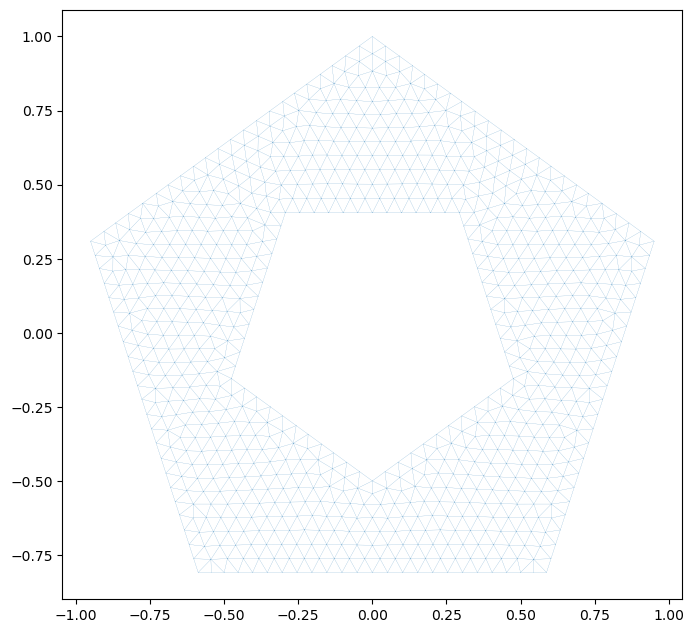

In [4]:
# pentagon w/ pentagonal hole
fig, ax = plt.subplots(figsize=(8,8))

#rotation matrix
R = lambda th: np.array([[np.cos(th), -np.sin(th)],[np.sin(th), np.cos(th)]])

def dpentagon(p,r=1):
    y = r*np.cos(36/180*np.pi)
    d = y+p[:,1]
    for n in range(4):
        d = np.minimum(d,y+np.matmul(p,R(72/180*np.pi*(n+1)))[:,1])
    return -d

# fix corners
pfix = []
rinner = .5
for i in range(5):
    th = (-90+36+i*72)*np.pi/180
    pfix.append([np.cos(th),np.sin(th)])
    pfix.append([rinner*np.cos(th),rinner*np.sin(-th)])

# remmove smaller pentagon rotated by 180
dcut = lambda p: dm.ddiff(dpentagon(p), dpentagon(np.matmul(p,R(np.pi)),rinner))
[pts,tri] = dm.distmesh2D(dcut,dm.huniform,.05,[-2,2,-2,2],pfix)

ax.set_aspect(1)
plt.savefig('pentagon.pdf')